## Predicting Customer Churn

In [271]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold

### Task 1: Load and explore the dataset: Analyze the distribution of features, check for missing values, and visualize relationships between features and the target variable (churn)

In [184]:
Churn_data = pd.read_csv('Telco-Customer-Churn.csv')
Churn_data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [186]:
Churn_data.shape

(7043, 21)

In [188]:
Churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [190]:
Churn_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [192]:
Churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

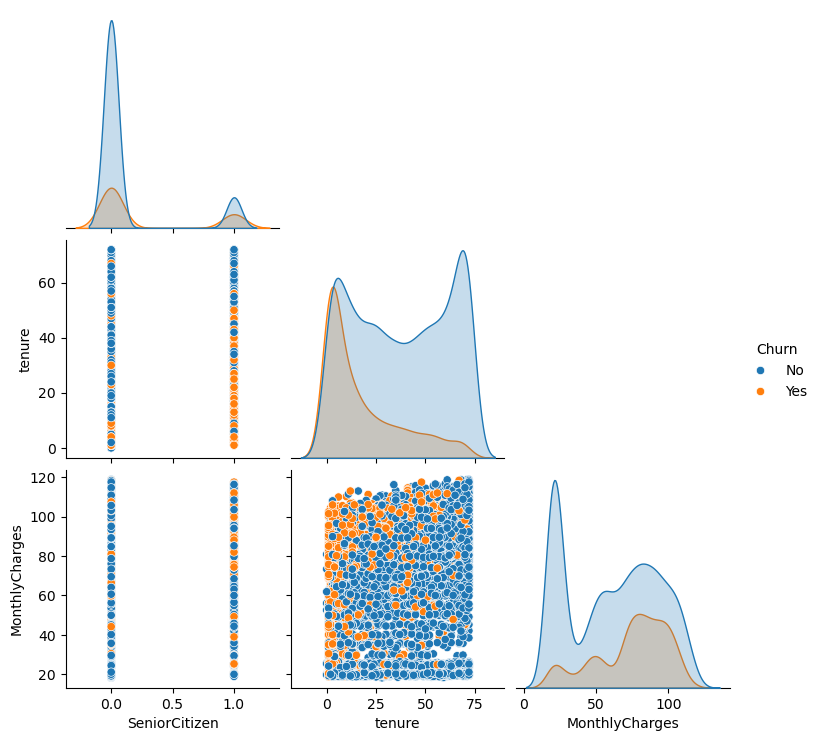

In [194]:
sns.pairplot(Churn_data, hue='Churn', corner=True)
plt.show()

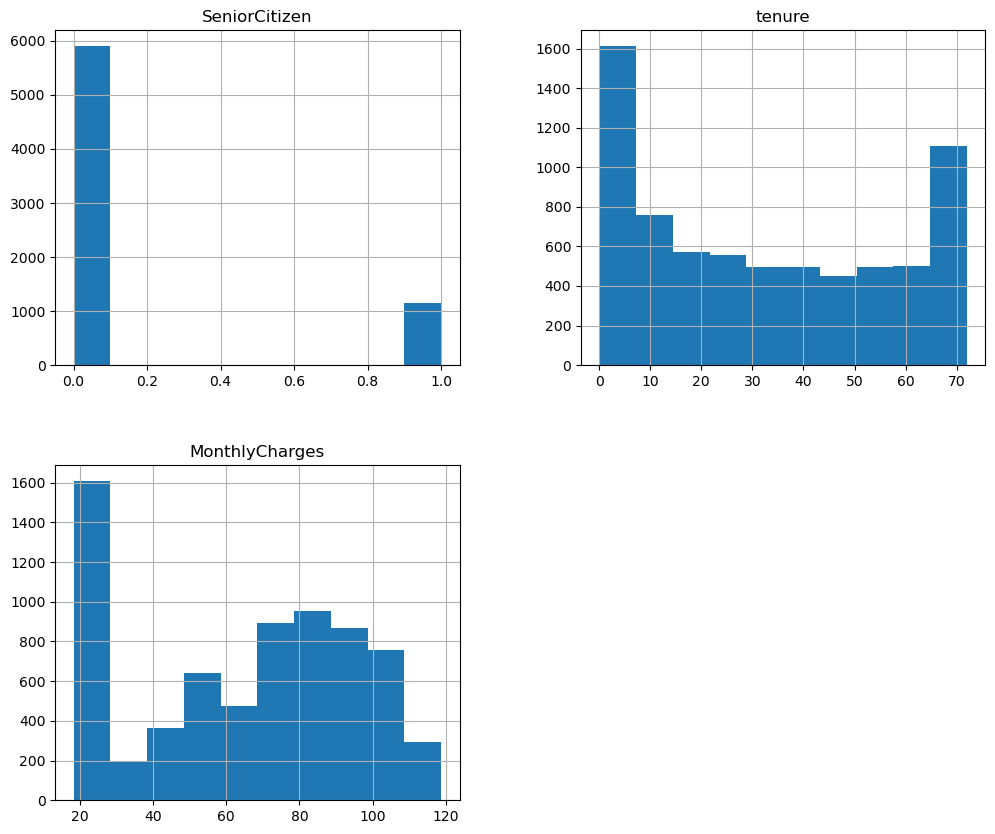

In [196]:
Churn_data.hist(figsize=(12, 10))
plt.show()

### Task 2: Preprocess the data: Handle missing values, convert categorical variables to numeric, and normalize/standardize the features if necessary

In [198]:
Churn_data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [200]:
data1 = Churn_data

In [202]:
data1.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [204]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [206]:
cols_to_encode = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Churn']

encoder = LabelEncoder()

for column in cols_to_encode:
    data1[column] = encoder.fit_transform(data1[column])

In [208]:
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,Month-to-month,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,One year,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,Month-to-month,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,One year,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,Month-to-month,1,2,70.70,151.65,1


In [210]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   int32  


In [212]:
data1['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [214]:
Ordinal_encoder = OrdinalEncoder()
data1[['Contract']] = Ordinal_encoder.fit_transform(data1[['Contract']]).astype(int)

In [216]:
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [218]:
data1['Contract'].unique()

array([0, 1, 2])

In [222]:
data1['TotalCharges'] = pd.to_numeric(data1['TotalCharges'], errors='coerce')
data1['TotalCharges'].fillna(data1['TotalCharges'].mean(), inplace=True)

C:\Users\mourr\AppData\Local\Temp\ipykernel_31308\3219912913.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['TotalCharges'].fillna(data1['TotalCharges'].mean(), inplace=True)


In [224]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int32  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int32  
 4   Dependents        7043 non-null   int32  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int32  
 7   MultipleLines     7043 non-null   int32  
 8   InternetService   7043 non-null   int32  
 9   OnlineSecurity    7043 non-null   int32  
 10  OnlineBackup      7043 non-null   int32  
 11  DeviceProtection  7043 non-null   int32  
 12  TechSupport       7043 non-null   int32  
 13  StreamingTV       7043 non-null   int32  
 14  StreamingMovies   7043 non-null   int32  
 15  Contract          7043 non-null   int32  
 16  PaperlessBilling  7043 non-null   int32  


In [232]:
data = data1

### Task 3: Split the dataset: Divide the dataset into training and testing sets

In [238]:
X = data.drop(['customerID', 'Churn'], axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [241]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Task 4: Train classification models: Train various classification models (e.g., logistic regression, KNN, SVM, decision tree, random forest, etc.) on the training dataset

In [245]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

svm = SVC(kernel='linear', C=1)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

dtree = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
gbn_pred = gnb.predict(X_test)

### Task 5: Evaluate the models: Assess the performance of the models using appropriate metrics such as accuracy, precision, recall, F1-score, and ROC-AUC

In [250]:
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_precision = precision_score(y_test, logreg_pred)
logreg_recall = recall_score(y_test, logreg_pred)
logreg_f1 = f1_score(y_test, logreg_pred)
print(f"Logistic Regression Accuracy = {logreg_accuracy}, Precision = {logreg_precision}, Recall = {logreg_recall}, F1 = {logreg_f1}")

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
print(f"Random Forest Accuracy = {rf_accuracy}, Precision = {rf_precision}, Recall = {rf_recall}, F1 = {rf_f1}")

knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)
print(f"K Nearest Neighbors Accuracy = {knn_accuracy}, Precision = {knn_precision}, Recall = {knn_recall}, F1 = {knn_f1}")

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
print(f"Support vector Machine Accuracy = {svm_accuracy}, Precision = {svm_precision}, Recall = {svm_recall}, F1 = {svm_f1}")

dtree_accuracy = accuracy_score(y_test, dtree_pred)
dtree_precision = precision_score(y_test, dtree_pred)
dtree_recall = recall_score(y_test, dtree_pred)
dtree_f1 = f1_score(y_test, dtree_pred)
print(f"Decision Tree Accuracy = {dtree_accuracy}, Precision = {dtree_precision}, Recall = {dtree_recall}, F1 = {dtree_f1}")


gbn_accuracy = accuracy_score(y_test, gbn_pred)
gbn_precision = precision_score(y_test, gbn_pred)
gbn_recall = recall_score(y_test, gbn_pred)
gbn_f1 = f1_score(y_test, gbn_pred)
print(f"Naive Bayes Accuracy = {gbn_accuracy}, Precision = {gbn_precision}, Recall = {gbn_recall}, F1 = {gbn_f1}")

Logistic Regression Accuracy = 0.8106956933270232, Precision = 0.68125, Recall = 0.5696864111498258, F1 = 0.6204933586337761
Random Forest Accuracy = 0.7936583057264552, Precision = 0.6751269035532995, Recall = 0.4634146341463415, F1 = 0.5495867768595041
K Nearest Neighbors Accuracy = 0.7382867960246096, Precision = 0.5196261682242991, Recall = 0.4843205574912892, F1 = 0.5013525698827773
Support vector Machine Accuracy = 0.8045433033601515, Precision = 0.6694736842105263, Recall = 0.554006968641115, F1 = 0.6062917063870352
Decision Tree Accuracy = 0.7766209181258874, Precision = 0.6363636363636364, Recall = 0.4146341463414634, F1 = 0.5021097046413502
Naive Bayes Accuracy = 0.7567439659252247, Precision = 0.5366748166259169, Recall = 0.764808362369338, F1 = 0.6307471264367817


### Task 6: Optimize the models: Perform hyperparameter tuning using techniques like grid search or random search to improve the performance of the models

In [256]:
param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'C': 10, 'solver': 'liblinear'}
Best Score: 0.8016227180527384


In [258]:
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'max_features': ['auto', 'sqrt']}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

C:\Users\mourr\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mourr\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mourr\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\mourr\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\mourr\anaconda3\Lib\site-packages\

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
Best Score: 0.7985801217038541


In [260]:
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best Score: 0.7663286004056795


In [263]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': ['scale', 'auto']}
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.7943204868154158


In [264]:
param_grid = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10], 'criterion': ['gini', 'entropy']}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best Score: 0.7872210953346856


In [269]:
param_grid = {'var_smoothing': np.logspace(-9, -3, 7)}
grid = GridSearchCV(GaussianNB(), param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validated Accuracy:", grid.best_score_)

Best Parameters: {'var_smoothing': 1e-09}
Best Cross-Validated Accuracy: 0.7490872210953347


### Task 7: Feature selection and dimensionality reduction: Apply feature selection techniques such as RFE, variance threshold, or dimensionality reduction methods like PCA and LDA to reduce the number of features and potentially improve model performance

In [273]:
best_params = {'C': 1.0, 'solver': 'liblinear'}
log_reg = LogisticRegression(**best_params)

rfe = RFE(estimator=log_reg, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

log_reg_optimized = LogisticRegression(**best_params)
log_reg_optimized.fit(X_train_rfe, y_train)

log_reg_preds = log_reg_optimized.predict(X_test_rfe)

accuracy = accuracy_score(y_test, log_reg_preds)
print(f"Accuracy with RFE and Logistic Regression: {accuracy:.4f}")

Accuracy with RFE and Logistic Regression: 0.8107


### Task 8: Select the best model: Choose the best-performing model based on the evaluation metrics

In [281]:
print("\nAccuracy score for most models below 0.8 but Logistic Regression performs better as the score is higher than 0.81")
print('Selected Model: Logistic Regression Model')


Accuracy score for most models below 0.8 but Logistic Regression performs better as the score is higher than 0.81
Selected Model: Logistic Regression Model


### Task 9: Interpret the results: Discuss the performance of the chosen model, the importance of different features, and any insights gained from the analysis

In [286]:
print('Logistic regression model performs better than others at the accuracy of 81.07%. This ccuracy is good but not too good. This means that using this model to predict new values results can only be 81% accurate.')

Logistic regression model performs better than others at the accuracy of 81.07%. This ccuracy is good but not too good. This means that using this model to predict new values results can only be 81% accurate.


### Conclusion

In [288]:
print("\nBased on the evaluation metrics, the Optimized Logistic Regression model is the best-performing model.")


Based on the evaluation metrics, the Optimized Logistic Regression model is the best-performing model.
